In [272]:
import pandas as pd
from pandas import DataFrame, Series
from string import punctuation
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [61]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [62]:
from nltk.corpus import wordnet

In [40]:
import csv

with open("C:/Users/carol/Desktop/Text Analytics/comments_homeaway_final.csv", encoding='windows-1252', errors='ignore') as f:
    reader = csv.reader(f)
    d ={'Property Link':[],'Date':[],'Review Rating':[],'Review Tagline':[],'Comments':[]}
    for row in reader:
        d['Property Link'].append(row[0])
        d['Date'].append(row[1])
        d['Review Rating'].append(row[2])
        d['Review Tagline'].append(row[3])
        d['Comments'].append(row[4])

In [49]:
temp = DataFrame(data=d)
df = temp.drop(temp.index[0]).reset_index(drop=True)

In [51]:
df[:5]

,Property Link,Date,Review Rating,Review Tagline,Comments
0,https://www.homeaway.com/vacation-rental/p1000...,26-Jul-18,05-May,Great home for a weekend away!,Barbara couldn't have made staying at her home...
1,https://www.homeaway.com/vacation-rental/p1000...,15-Jan-18,05-May,Colorful and clean house perfect for a group o...,We were four co-workers traveling to Austin fo...
2,https://www.homeaway.com/vacation-rental/p1004...,29-Apr-18,05-May,Incredible Experience,We had an amazing time staying at Dan's beauti...
3,https://www.homeaway.com/vacation-rental/p1004...,27-Mar-18,05-May,"Great Looking, Modern House in Awesome Zilker ...",Had a great experience staying in Zilker at Da...
4,https://www.homeaway.com/vacation-rental/p1004...,09-Oct-17,05-May,Perfect ACL house!!,"Owners were fantastic, House was gorgeous and ..."


Clean Review Taglines and Comments

In [285]:
def lowerize(x):
    return x.lower()

def remove_stopwords(s):
    return [w for w in s if not w in stop_words]

def get_pos( word ):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(3)
    return most_common_pos_list[0][0]

In [67]:
df['Comments_lwr']=df['Comments'].apply(lowerize).apply(word_tokenize)

In [57]:
def lemmatize(list_input):
    wordnet_lemmatizer=WordNetLemmatizer()
    word_lemmatized=[wordnet_lemmatizer.lemmatize(w,pos=get_pos(w)) for w in list_input]
    return word_lemmatized

In [136]:
df['Comments_lmt3']=df['Comments_lwr'].apply(lemmatize)

In [188]:
def removepunc(input_list):
    for word in input_list:
        if word in punctuation_list:
            z = input_list.remove(word)
        else:
            z = input_list
    return z

In [241]:
punctuation_list=list(punctuation)

def removepuncword(input_list):
    remove=0
    for word in input_list:
        x=list(word)
        for i in x:
            if i in punctuation_list:
                remove=True
            else:
                remove=False
        if remove==True:
            y=input_list.remove(word)
        else:
            y=input_list
    return y

In [145]:
df['Comments_lmt4']=df['Comments_lmt3'].apply(removepunc)

In [158]:
for word in df['Comments_lmt4'][0]:
    x=list(word)
    for i in x:
        if i in punctuation_list:
            y=df['Comments_lmt4'][0].remove(word)
        else:
            y=df['Comments_lmt4'][0]
print(y)

['barbara', 'could', 'have', 'make', 'stay', 'at', 'her', 'home', 'any', 'easy', 'the', 'communication', 'before', 'and', 'during', 'our', 'stay', 'be', 'wonderful', 'and', 'then', 'the', 'home', 'itself', 'turn', 'out', 'to', 'be', 'even', 'well', 'than', 'it', 'look', 'in', 'photo', 'the', 'home', 'be', 'spacious', 'and', 'cozy', 'with', 'a', 'great', 'backyard', 'and', 'pool', 'which', 'we', 'definitely', 'take', 'advantage', 'of', 'the', 'home', 'be', 'very', 'close', 'to', 'a', 'grocery', 'store', 'a', 'well', 'overall', 'i', 'would', 'happily', 'recommend', 'this', 'spot', 'to', 'any', 'group', 'of', 'traveler', 'look', 'for', 'a', 'quiet', 'cozy', 'place', 'to', 'spend', 'a', 'vacation']


In [164]:
df['Comments_final']=df['Comments_lmt4'].apply(removepuncword)

In [167]:
df['Tagline_lwr']=df['Review Tagline'].apply(lowerize).apply(word_tokenize)

In [168]:
df['Tagline_lmt']=df['Tagline_lwr'].apply(lemmatize)

In [196]:
def removepunc(input_list):
    b=0
    for word in input_list:
        if word in punctuation_list:
            b = input_list.remove(word)
        else:
            b = input_list
    return b

In [200]:
df['Tagline_rmpc']=df['Tagline_lmt'].apply(removepunc)

In [261]:
punctuation_list=list(punctuation)

punctuation_list=list(punctuation)

def removepuncword2(input_list):
    y=0
    remove=0
    for word in input_list:
        x=list(word)
        for i in x:
            if i in punctuation_list:
                remove=True
            else:
                remove=False
        if remove==True:
            y=input_list.remove(word)
        else:
            y=input_list
    return y

In [252]:
idx=[]
for i in range(len(df['Tagline_rmpc'])):
    if type(df['Tagline_rmpc'][i])==int:
        idx.append(i)
print(idx)

[204, 3059]


In [264]:
df['Tagline_rmpc']=df['Tagline_rmpc'].fillna('x')

In [265]:
df['Tagline_rmpc'][204]='x'
df['Tagline_rmpc'][3059]='x'

In [267]:
df['Review Tagline final']=df['Tagline_rmpc'].apply(removepuncword2)

In [269]:
df2 = df[['Property Link','Date','Review Rating','Review Tagline final','Comments_final']]

In [271]:
df2.to_csv('homeaway_cleaned.csv', header=True, sep=',')

In [281]:
with open("C:/Users/carol/Downloads/comments_final_reduced.csv", encoding='windows-1252', errors='ignore') as f:
    reader = csv.reader(f)
    d ={'Index':[],'Property Link':[],'Date':[],'Rating':[],'Comments Final':[]}
    for row in reader:
        d['Index'].append(row[0])
        d['Property Link'].append(row[1])
        d['Date'].append(row[2])
        d['Rating'].append(row[3])
        d['Comments Final'].append(row[4])

In [282]:
temp2 = DataFrame(data=d)
df2 = temp2.drop(temp.index[0]).reset_index(drop=True)

In [283]:
import copy
df3 = copy.deepcopy(df2)

In [284]:
df3[:5]

,Index,Property Link,Date,Rating,Comments Final
0,5,https://www.homeaway.com/vacation-rental/p1006...,13-Aug-18,4,"['the', 'catherine']"
1,6,https://www.homeaway.com/vacation-rental/p1006...,26-Jul-18,5,"['second', 'time', 'stay', 'here']"
2,7,https://www.homeaway.com/vacation-rental/p1006...,29-May-18,5,"['perfect', 'location', 'beautiful', 'apartment']"
3,8,https://www.homeaway.com/vacation-rental/p1006...,16-May-18,5,"['excellent', 'and', 'all', 'that', 'we', 'hop..."
4,9,https://www.homeaway.com/vacation-rental/p1006...,3-May-18,4,"['great', 'condo']"


In [299]:
stop_words=set(stopwords.words('english'))
def remove_stopwords(s):
    return [w for w in s if not w in stop_words]

In [302]:
s= df3['Comments Final'][0]

In [321]:
print(s)

['the', 'catherine']


In [330]:
print(s.split("', '"))

["['the", "catherine']"]


In [331]:
print(s.lstrip("['").rstrip("']").split("', '"))

['the', 'catherine']


In [332]:
def str_list(x):
    return x.lstrip("['").rstrip("']").split("', '")

In [333]:
df3['Comments Final']=df3['Comments Final'].apply(str_list)

In [358]:
amenities=['kitchen','room','bed','bathroom','towels','bedroom','tv','shower']
location_to_city=['downtown','restaurants','walking','close','congress']
nature=['barton','spring']
group_size=['family','group','plenty','space','friends','party','large']

In [338]:
amenities_parse=[]
for i in range(len(s)):
    if s[i] in amenities:
        amenities_parse.append(s[i-3:i+3])
    else:
        amenities_parse.append(0)        

In [339]:
amenities_parse

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [347]:
s[0:4]

"['th"

In [415]:
def amenities_parse(words):
    x=[]
    for i in range(len(words)):
        if i<3:
            if words[i] in amenities:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        elif i<len(words)-3:
            if words[i] in amenities:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        else:
            if words[i] in amenities:
                x+=words[i-3:i+3]
            else:
                x+=['x']
    return x

In [416]:
df3['Amenities Parsed']=df3['Comments Final'].apply(amenities_parse)

In [417]:
def ltc_parse(words):
    x=[]
    for i in range(len(words)):
        if i<3:
            if words[i] in location_to_city:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        elif i<len(words)-3:
            if words[i] in location_to_city:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        else:
            if words[i] in location_to_city:
                x+=words[i-3:i+3]
            else:
                x+=['x']
    return x

In [418]:
df3['Location Parsed']=df3['Comments Final'].apply(ltc_parse)

In [419]:
def nature_parse(words):
    x=[]
    for i in range(len(words)):
        if i<3:
            if words[i] in nature:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        elif i<len(words)-3:
            if words[i] in nature:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        else:
            if words[i] in nature:
                x+=words[i-3:i+3]
            else:
                x+=['x']
    return x

In [420]:
df3['Nature Parsed']=df3['Comments Final'].apply(nature_parse)

In [421]:
def group_parse(words):
    x=[]
    for i in range(len(words)):
        if i<3:
            if words[i] in group_size:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        elif i<len(words)-3:
            if words[i] in group_size:
                x+=words[i-3:i+3]
            else:
                x+=['x']
        else:
            if words[i] in group_size:
                x+=words[i-3:i+3]
            else:
                x+=['x']
    return x

In [422]:
df3['Group Parsed']=df3['Comments Final'].apply(group_parse)

In [366]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...


True

In [367]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()

In [441]:
nature_sentiment=DataFrame({'neg':0,'neu':0,'pos':0,'compound':0}, index=range(len(df3)))
location_sentiment=DataFrame({'neg':0,'neu':0,'pos':0,'compound':0}, index=range(len(df3)))
group_sentiment=DataFrame({'neg':0,'neu':0,'pos':0,'compound':0}, index=range(len(df3)))
amenities_sentiment=DataFrame({'neg':0,'neu':0,'pos':0,'compound':0}, index=range(len(df3)))

In [458]:
ss=0
for j in range(len(df3)):
    for i in range(len(df3['Nature Parsed'][j])):
        ss=sid.polarity_scores(df3['Nature Parsed'][j][i])
        nature_sentiment['neg'][j]+=ss['neg']
        nature_sentiment['neu'][j]+=ss['neu']
        nature_sentiment['pos'][j]+=ss['pos']
        nature_sentiment['compound'][j]+=ss['compound']

In [443]:
for j in range(len(df3['Amenities Parsed'])):
    for i in range(len(df3['Amenities Parsed'][j])):
        ss = sid.polarity_scores(df3['Amenities Parsed'][j][i])
        amenities_sentiment['neg'][j]+=ss['neg']
        amenities_sentiment['neu'][j]+=ss['neu']
        amenities_sentiment['pos'][j]+=ss['pos']
        amenities_sentiment['compound'][j]+=ss['compound']

In [444]:
for j in range(len(df3['Location Parsed'])):
    for i in range(len(df3['Location Parsed'][j])):
        ss = sid.polarity_scores(df3['Location Parsed'][j][i])
        location_sentiment['neg'][j]+=ss['neg']
        location_sentiment['neu'][j]+=ss['neu']
        location_sentiment['pos'][j]+=ss['pos']
        location_sentiment['compound'][j]+=ss['compound']

In [445]:
for j in range(len(df3['Group Parsed'])):
    for i in range(len(df3['Group Parsed'][j])):
        ss = sid.polarity_scores(df3['Group Parsed'][j][i])
        group_sentiment['neg'][j]+=ss['neg']
        group_sentiment['neu'][j]+=ss['neu']
        group_sentiment['pos'][j]+=ss['pos']
        group_sentiment['compound'][j]+=ss['compound']

In [430]:
df3.columns

Index(['Index', 'Property Link', 'Date', 'Rating', 'Comments Final',
       'Sentiment Parsed', 'Amenities Parsed', 'Location Parsed',
       'Nature Parsed', 'Group Parsed'],
      dtype='object')

In [446]:
nature_sentiment.apply(to_one)

neg         0
neu         0
pos         0
compound    0
dtype: int64

In [459]:
location_sentiment['neg'].apply(to_one)
location_sentiment['neu'].apply(to_one)
location_sentiment['pos'].apply(to_one)
location_sentiment['compound'].apply(to_one)
amenities_sentiment['neg'].apply(to_one)
amenities_sentiment['neu'].apply(to_one)
amenities_sentiment['pos'].apply(to_one)
amenities_sentiment['compound'].apply(to_one)
nature_sentiment['neg'].apply(to_one)
nature_sentiment['neu'].apply(to_one)
nature_sentiment['pos'].apply(to_one)
nature_sentiment['compound'].apply(to_one)
group_sentiment['neg'].apply(to_one)
group_sentiment['neu'].apply(to_one)
group_sentiment['pos'].apply(to_one)
group_sentiment['compound'].apply(to_one)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
7554    0
7555    0
7556    0
7557    0
7558    0
7559    0
7560    0
7561    0
7562    0
7563    0
7564    0
7565    0
7566    0
7567    0
7568    0
7569    0
7570    0
7571    0
7572    0
7573    0
7574    0
7575    0
7576    0
7577    0
7578    0
7579    0
7580    0
7581    0
7582    0
7583    0
Name: compound, Length: 7584, dtype: int64

In [434]:
df4.columns=['Property Link','Date','Rating','amn_neg','amn_neu','amn_pos','amn_compound','loc_neg','loc_neu','loc_pos','loc_compound','nt_neg','nt_neu','nt_pos','nt_compound','gp_neg','gp_neu','gp_pos','gp_compound']

In [435]:
df4

,Property Link,Date,Rating,amn_neg,amn_neu,amn_pos,amn_compound,loc_neg,loc_neu,loc_pos,loc_compound,nt_neg,nt_neu,nt_pos,nt_compound,gp_neg,gp_neu,gp_pos,gp_compound
0,https://www.homeaway.com/vacation-rental/p1006...,13-Aug-18,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.homeaway.com/vacation-rental/p1006...,26-Jul-18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.homeaway.com/vacation-rental/p1006...,29-May-18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.homeaway.com/vacation-rental/p1006...,16-May-18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,https://www.homeaway.com/vacation-rental/p1006...,3-May-18,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,https://www.homeaway.com/vacation-rental/p1006...,15-Apr-18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,https://www.homeaway.com/vacation-rental/p1006...,9-Apr-18,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,https://www.homeaway.com/vacation-rental/p1006...,7-Apr-18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,https://www.homeaway.com/vacation-rental/p1006...,25-Feb-18,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,https://www.homeaway.com/vacation-rental/p1006...,7-Feb-18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [436]:
df4.to_csv("Sentiment_scored.csv", header=True, sep=',')

In [456]:
def to_one(x):
    x=0
    if x>=1:
        x=1
    else:
        x=0
    return x

In [461]:
df4[['amn_neg','amn_neu','amn_pos','amn_compound','loc_neg','loc_neu','loc_pos','loc_compound','nt_neg','nt_neu','nt_pos','nt_compound','gp_neg','gp_neu','gp_pos','gp_compound']].apply(sum)

amn_neg            0
amn_neu            0
amn_pos            0
amn_compound       0
loc_neg            9
loc_neu         1105
loc_pos           85
loc_compound       0
nt_neg             0
nt_neu            97
nt_pos             2
nt_compound        0
gp_neg             0
gp_neu          1701
gp_pos           294
gp_compound        0
dtype: int64

In [462]:
dg=pd.read_csv("C:/Users/carol/Desktop/Data Management/Final_dataframe_new (version 1).csv")

In [463]:
dg.columns

Index(['Property Link', 'max_topic_score', 'Topic with max probability',
       'Sent_score', 'Final_topic_score', 'max_sim_score', 'similarity_max',
       'similarity_topic'],
      dtype='object')

In [467]:
categorical_columns = ['Topic with max probability','similarity_topic']
df_dummies = pd.get_dummies(dg[categorical_columns], prefix=categorical_columns,columns=categorical_columns)
dummy_column_names = df_dummies.columns.values

In [468]:
df5 = pd.concat([dg, df_dummies], axis=1)

In [469]:
df5.columns

Index(['Property Link', 'max_topic_score', 'Topic with max probability',
       'Sent_score', 'Final_topic_score', 'max_sim_score', 'similarity_max',
       'similarity_topic', 'Topic with max probability_topic_0',
       'Topic with max probability_topic_1',
       'Topic with max probability_topic_2',
       'Topic with max probability_topic_3', 'similarity_topic_topic_0',
       'similarity_topic_topic_1', 'similarity_topic_topic_2',
       'similarity_topic_topic_3'],
      dtype='object')

In [485]:
import numpy as np

In [491]:
x=df5[['Topic with max probability_topic_0','similarity_topic_topic_0']]

In [496]:
y=df5[['Topic with max probability_topic_1','similarity_topic_topic_1']]

In [497]:
z=df5[['Topic with max probability_topic_2','similarity_topic_topic_2']]

In [498]:
a=df5[['Topic with max probability_topic_3','similarity_topic_topic_3']]

In [495]:
x.pivot_table(index='Topic with max probability_topic_0', columns='similarity_topic_topic_0', aggfunc=len)

similarity_topic_topic_0,0,1
Topic with max probability_topic_0,,
0,75,45
1,38,29


In [499]:
y.pivot_table(index='Topic with max probability_topic_1', columns='similarity_topic_topic_1', aggfunc=len)

similarity_topic_topic_1,0,1
Topic with max probability_topic_1,,
0,149,18
1,17,3


In [500]:
z.pivot_table(index='Topic with max probability_topic_2', columns='similarity_topic_topic_2', aggfunc=len)

similarity_topic_topic_2,0,1
Topic with max probability_topic_2,,
0,157,14
1,13,3


In [501]:
a.pivot_table(index='Topic with max probability_topic_3', columns='similarity_topic_topic_3', aggfunc=len)

similarity_topic_topic_3,0,1
Topic with max probability_topic_3,,
0,69,34
1,43,41


In [494]:
pd.pivot_table(df5, index=['Topic with max probability_topic_0'], columns=['similarity_topic_topic_0'], aggfunc=np.sum)

Final_topic_score           Sent_score  \
similarity_topic_topic_0                           0         1          0   
Topic with max probability_topic_0                                          
0                                           5.159513  0.508469  29.625559   
1                                           1.777450  1.044735  11.853314   

                                               \
similarity_topic_topic_0                    1   
Topic with max probability_topic_0              
0                                   15.041026   
1                                   11.587452   

                                   Topic with max probability_topic_1     \
similarity_topic_topic_0                                            0  1   
Topic with max probability_topic_0                                         
0                                                                  13  7   
1                                                                   0  0   

                                   Topic with max probability_topic_2     \
similarity_topic_topic_0                                            0  1   
Topic with max probability_topic_0                                         
0                                                                   8  8   
1                                                                   0  0   

                                   Topic with max probability_topic_3      \
similarity_topic_topic_0                                            0   1   
Topic with max probability_topic_0                                          
0                                                                  54  30   
1                                                                   0   0   

                                   max_sim_score           max_topic_score  \
similarity_topic_topic_0                       0         1               0   
Topic with max probability_topic_0                                           
0                                      12.489314  1.318706       30.983399   
1                                       6.011841  2.725288       15.902798   

                                              similarity_topic_topic_1     \
similarity_topic_topic_0                    1                        0  1   
Topic with max probability_topic_0                                          
0                                   17.655420                       13  0   
1                                   14.602747                        8  0   

                                   similarity_topic_topic_2     \
similarity_topic_topic_0                                  0  1   
Topic with max probability_topic_0                               
0                                                         7  0   
1                                                        10  0   

                                   similarity_topic_topic_3     
similarity_topic_topic_0                                  0  1  
Topic with max probability_topic_0                              
0                                                        55  0  
1                                                        20  0

In [466]:
dg.columns

Index(['Property Link', 'max_topic_score', 'Topic with max probability',
       'Sent_score', 'Final_topic_score', 'max_sim_score', 'similarity_max',
       'similarity_topic'],
      dtype='object')

In [521]:
ss_std=np.std(df5['Sent_score'])

In [524]:
df5['Sent_score'].mean()

0.36421042493048106

In [522]:
sm_std=np.std(df5['max_sim_score'])

In [525]:
df5['Sent_scaled']=(df5['Sent_score']-df5['Sent_score'].mean())/ss_std

In [526]:
df5['Sim_scaled']=(df5['max_sim_score']-df5['max_sim_score'].mean())/sm_std

In [506]:
b=df5[['Sent_score','max_sim_score']]

In [505]:
df5[:5]

,Property Link,max_topic_score,Topic with max probability,Sent_score,Final_topic_score,max_sim_score,similarity_max,similarity_topic,Topic with max probability_topic_0,Topic with max probability_topic_1,Topic with max probability_topic_2,Topic with max probability_topic_3,similarity_topic_topic_0,similarity_topic_topic_1,similarity_topic_topic_2,similarity_topic_topic_3
0,https://www.homeaway.com/vacation-rental/p1547...,0.371626,topic_0,0.275800,0.088327,0.320256,similarity_3,topic_3,1,0,0,0,0,0,0,1
1,https://www.homeaway.com/vacation-rental/p3750...,0.500312,topic_0,0.408350,0.113256,0.277350,similarity_3,topic_3,1,0,0,0,0,0,0,1
2,https://www.homeaway.com/vacation-rental/p3466...,0.470880,topic_0,0.381267,0.074773,0.196116,similarity_3,topic_3,1,0,0,0,0,0,0,1
3,https://www.homeaway.com/vacation-rental/p3015...,0.313451,topic_0,0.362575,0.067040,0.184900,similarity_3,topic_3,1,0,0,0,0,0,0,1
4,https://www.homeaway.com/vacation-rental/p3522...,0.474381,topic_0,0.318792,0.058945,0.184900,similarity_3,topic_3,1,0,0,0,0,0,0,1


In [507]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(b)

In [510]:
normalized=DataFrame(np_scaled)

In [518]:
normalized.columns

RangeIndex(start=0, stop=2, step=1)

In [517]:
import matplotlib.pyplot as plt

In [527]:
scaled=df5[['Sent_scaled','Sim_scaled']]

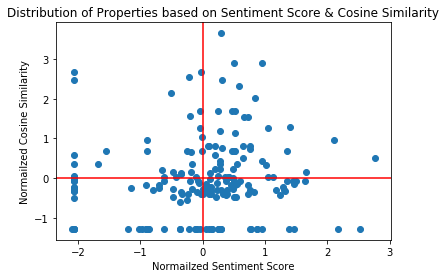

In [537]:
plt.scatter(x=df5['Sent_scaled'], y=df5['Sim_scaled'])
plt.xlabel('Normailzed Sentiment Score')
plt.ylabel('Normailzed Cosine Similarity')
plt.title('Distribution of Properties based on Sentiment Score & Cosine Similarity')
plt.axvline(x=0.0, c='r')
plt.axhline(y=0.0, c='r')

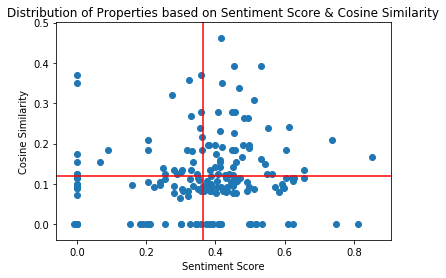

In [540]:
plt.scatter(x=df5['Sent_score'], y=df5['max_sim_score'])
plt.xlabel('Sentiment Score')
plt.ylabel('Cosine Similarity')
plt.title('Distribution of Properties based on Sentiment Score & Cosine Similarity')
plt.axvline(x=df5['Sent_score'].mean(), c='r')
plt.axhline(y=df5['max_sim_score'].mean(), c='r')

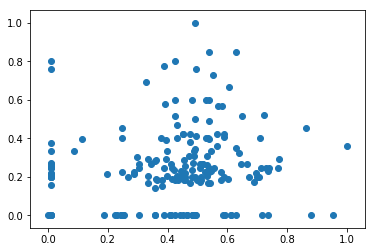

In [520]:
plt.scatter(x=normalized[0], y=normalized[1])

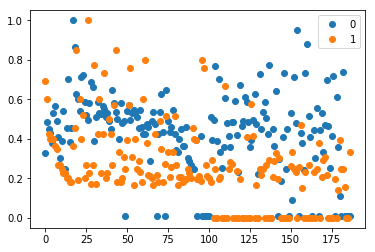

In [516]:
normalized.plot(marker='o', linestyle='None')

In [511]:
normalized.plot()